##HANDWRITING TRANSFORMER

In [ ]:
!git clone https://github.com/ankanbhunia/Handwriting-Transformers
%cd Handwriting-Transformers


Cloning into 'Handwriting-Transformers'...
remote: Enumerating objects: 544, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 544 (delta 75), reused 49 (delta 46), pack-reused 425
Receiving objects: 100% (544/544), 67.89 MiB | 20.41 MiB/s, done.
Resolving deltas: 100% (217/217), done.
/content/Handwriting-Transformers


In [ ]:
!pip install gdown
!gdown --id 16g9zgysQnWk7-353_tMig92KsZsrcM6k && unzip files.zip && rm files.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=16g9zgysQnWk7-353_tMig92KsZsrcM6k
From (redirected): https://drive.google.com/uc?id=16g9zgysQnWk7-353_tMig92KsZsrcM6k&confirm=t&uuid=ec6d8613-30f2-477a-a5e6-2fc6da0c1093
To: /content/Handwriting-Transformers/files.zip
100% 685M/685M [00:10<00:00, 62.3MB/s]
Archive:  files.zip
  inflating: files/cvl_model.pth     
  inflating: files/CVL-32.pickle     
  inflating: files/english_words.txt  
  inflating: files/iam_model.pth     
  inflating: files/IAM-32.pickle     


In [ ]:
import os
import time
from data.dataset import TextDataset, TextDatasetval
import torch
import cv2
import os
import numpy as np
from models.model import TRGAN
from params import *
from torch import nn
from data.dataset import get_transform
import pickle
from PIL import Image
import tqdm
import shutil

In [ ]:
text = "A paragraph is a series of related sentences developing a central idea, called the topic. Try to think about paragraphs in terms of thematic unity: a paragraph is a sentence or a group of sentences that supports one central, unified idea. Paragraphs add one idea at a time to your broader argument"
output_path = '/content/results'

In [ ]:
model_path = 'files/iam_model.pth'; data_path = 'files/IAM-32.pickle'

In [ ]:
TextDatasetObjval = TextDatasetval(base_path = data_path, num_examples = 15)
datasetval = torch.utils.data.DataLoader(
            TextDatasetObjval,
            batch_size=batch_size,
            shuffle=True,
            num_workers=0,
            pin_memory=True, drop_last=True,
            collate_fn=TextDatasetObjval.collate_fn)

In [ ]:
model = TRGAN()
model.netG.load_state_dict(torch.load(model_path,map_location=torch.device('cpu')))

initialize network with N02
initialize network with N02
initialize network with N02


<All keys matched successfully>

In [ ]:
text_encode =  [j.encode() for j in text.split(' ')]
eval_text_encode, eval_len_text = model.netconverter.encode(text_encode)
eval_text_encode = eval_text_encode.repeat(batch_size, 1, 1)

In [ ]:
if os.path.isdir(output_path): shutil.rmtree(output_path)
os.makedirs(output_path, exist_ok = True)

for i,data_val in enumerate(tqdm.tqdm(datasetval)):

    page_val = model._generate_page(data_val['simg'].to(DEVICE), data_val['swids'], eval_text_encode,eval_len_text)

    cv2.imwrite(output_path+'/image' + str(i) + '.png', page_val*255)

print ('\nOutput images saved in : ' + output_path)

100%|██████████| 20/20 [24:47<00:00, 74.39s/it]


Output images saved in : /content/results


In [ ]:
from IPython.display import Image

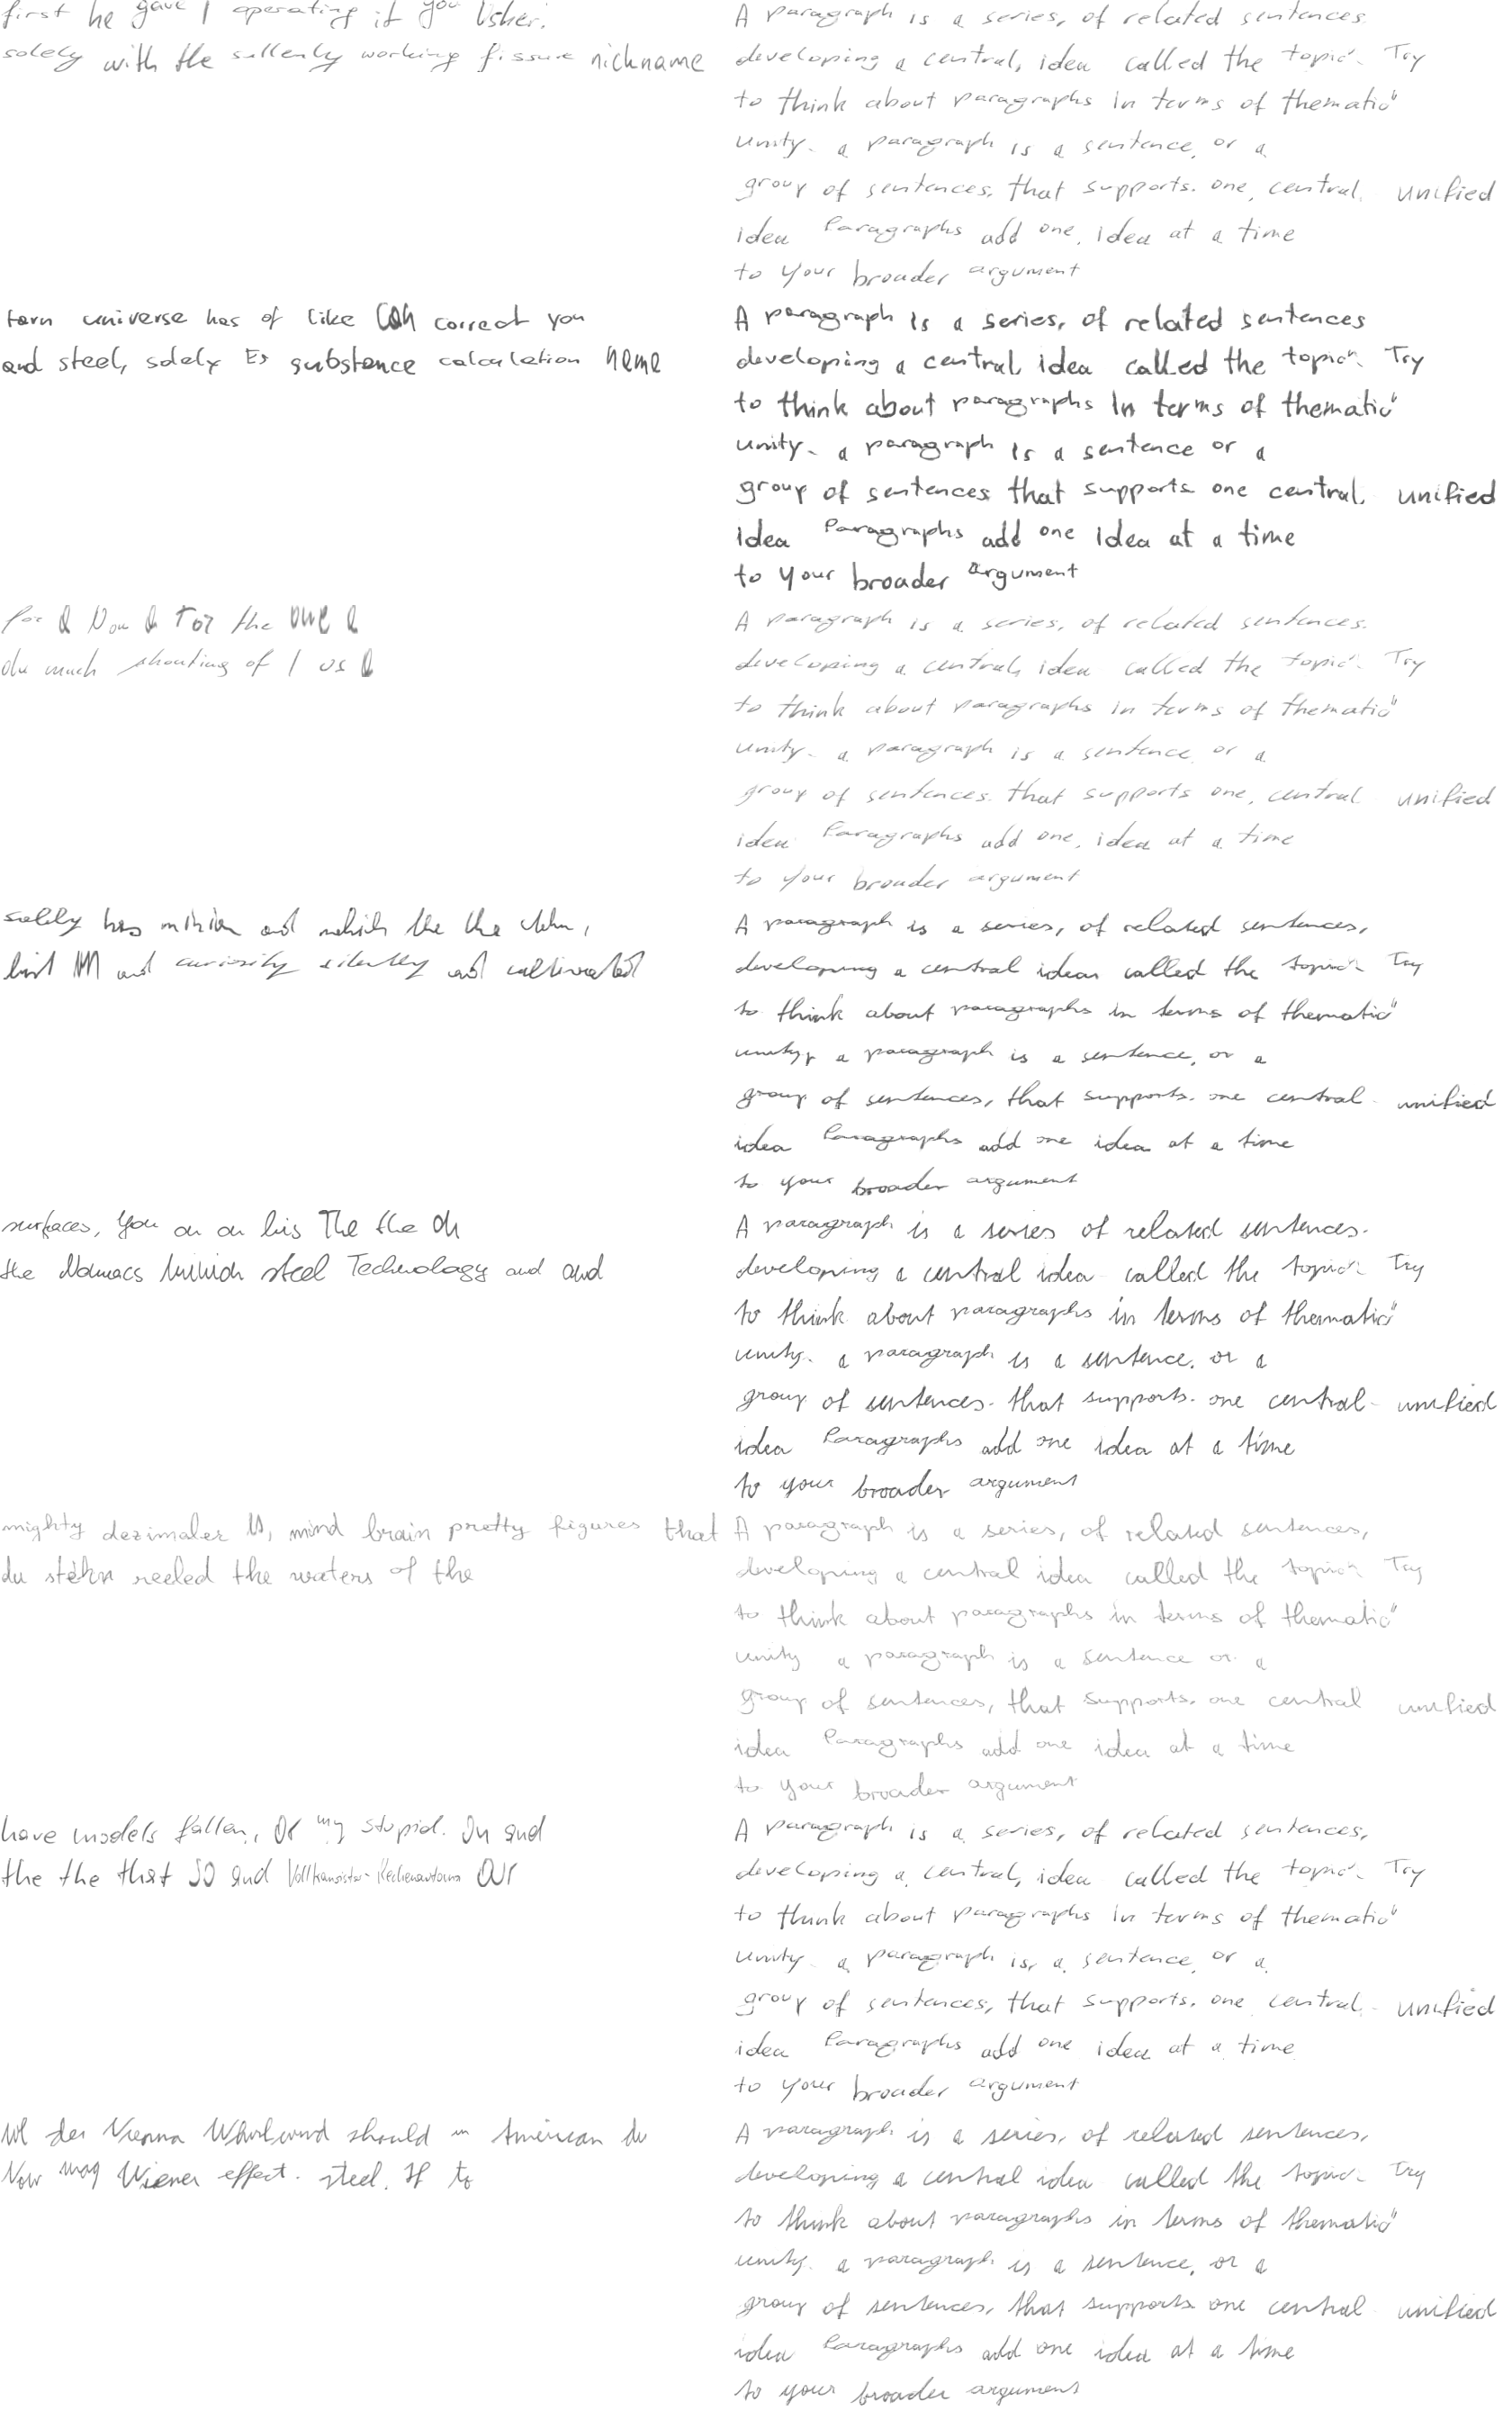

In [ ]:
Image('results/image0.png')
